Importing all necessary packages

In [1]:
# Basic Import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Modelling
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression, Ridge,Lasso
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error
from sklearn.model_selection import RandomizedSearchCV
from catboost import CatBoostRegressor
from xgboost import XGBRegressor
import warnings

Import the CSV Data as Pandas DataFrame

In [2]:
import pandas as pd

In [3]:
data = pd.read_csv('data/augmented_data.csv')

In [4]:
data_columns = data.columns

In [5]:
print(data_columns)

Index(['age', 'blood_pressure', 'albumin', 'sugar', 'pus_cell',
       'blood_glucose_random', 'blood_urea', 'serum_creatinine', 'sodium',
       'haemoglobin', 'packed_cell_volume', 'white_blood_cell_count',
       'red_blood_cell_count', 'hypertension', 'diabetes_mellitus', 'appetite',
       'peda_edema', 'classification'],
      dtype='object')


In [3]:
df = data
df.head()

,age,blood_pressure,albumin,sugar,pus_cell,blood_glucose_random,blood_urea,serum_creatinine,sodium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,appetite,peda_edema,classification
0,17.010927,60.018870,0.000252,-0.015115,1.022357,92.016389,31.999180,2.081479,140.994908,13.906602,51.987796,6999.991765,5.199520,0.989903,0.998597,0.997944,1.011171,0.011979
1,55.150236,65.356296,0.003293,0.015222,1.003268,111.787302,32.216957,1.045412,142.321212,15.454275,42.221887,8100.002265,5.279943,0.992009,0.999544,0.995524,0.995095,0.976771
2,38.010433,80.003534,-0.013009,0.010803,0.992742,98.996168,19.023159,0.510177,146.999159,13.595679,43.990509,7299.993831,6.395761,0.989530,1.006251,1.008705,0.985446,1.018140
3,23.004763,79.998774,0.022357,-0.001229,0.993943,110.996193,34.013411,1.117904,144.996281,14.291265,41.002579,7200.001722,4.996074,1.009862,1.000955,1.002383,0.992528,1.011140
4,50.008856,89.994330,0.004291,-0.020354,0.994854,88.978590,117.980301,6.110206,126.999302,6.013594,17.007769,6500.002333,5.207646,-0.000576,-0.019069,1.016601,0.011465,0.006999


In [4]:
df.shape

(5000, 18)

Preparing X and Y variables

In [5]:
X = df.drop(columns=['classification'],axis=1)

In [6]:
X.head()

,age,blood_pressure,albumin,sugar,pus_cell,blood_glucose_random,blood_urea,serum_creatinine,sodium,haemoglobin,packed_cell_volume,white_blood_cell_count,red_blood_cell_count,hypertension,diabetes_mellitus,appetite,peda_edema
0,17.010927,60.018870,0.000252,-0.015115,1.022357,92.016389,31.999180,2.081479,140.994908,13.906602,51.987796,6999.991765,5.199520,0.989903,0.998597,0.997944,1.011171
1,55.150236,65.356296,0.003293,0.015222,1.003268,111.787302,32.216957,1.045412,142.321212,15.454275,42.221887,8100.002265,5.279943,0.992009,0.999544,0.995524,0.995095
2,38.010433,80.003534,-0.013009,0.010803,0.992742,98.996168,19.023159,0.510177,146.999159,13.595679,43.990509,7299.993831,6.395761,0.989530,1.006251,1.008705,0.985446
3,23.004763,79.998774,0.022357,-0.001229,0.993943,110.996193,34.013411,1.117904,144.996281,14.291265,41.002579,7200.001722,4.996074,1.009862,1.000955,1.002383,0.992528
4,50.008856,89.994330,0.004291,-0.020354,0.994854,88.978590,117.980301,6.110206,126.999302,6.013594,17.007769,6500.002333,5.207646,-0.000576,-0.019069,1.016601,0.011465


In [11]:
X_features = X.columns

In [12]:
# Create a StandardScaler and ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer

numeric_transformer = StandardScaler()

preprocessor = ColumnTransformer(
    [
         ("StandardScaler", numeric_transformer, X_features),        
    ]
)

In [13]:
X = preprocessor.fit_transform(X)

In [14]:
X.shape

(5000, 17)

In [15]:
X_data = pd.DataFrame(X, columns=None)

In [16]:
X_data.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,-2.048723,-1.239221,-0.581454,-0.341019,0.481967,-0.638442,-0.439787,-0.089583,0.370259,0.222501,1.447224,-0.701660,0.280464,0.610604,0.613307,0.433771,0.450306
1,0.292634,-0.802735,-0.578970,-0.308082,0.428416,-0.346253,-0.435045,-0.291407,0.528063,0.795387,0.204393,-0.247250,0.376680,0.615266,0.615427,0.427211,0.405163
2,-0.759572,0.395093,-0.592285,-0.312880,0.398888,-0.535289,-0.722334,-0.395669,1.084646,0.107410,0.429471,-0.577730,1.711616,0.609779,0.630439,0.462941,0.378069
3,-1.680764,0.394704,-0.563400,-0.325943,0.402258,-0.357945,-0.395928,-0.277285,0.846343,0.364888,0.049221,-0.619037,0.037067,0.654784,0.618585,0.445805,0.397956
4,-0.022994,1.212124,-0.578155,-0.346708,0.404813,-0.683336,1.432417,0.695201,-1.294940,-2.699170,-3.004414,-0.908203,0.290187,-1.581839,-1.664477,0.484343,-2.356852


In [20]:
y = df['classification']
print(y.shape)

(5000,)


In [22]:
# separate dataset into train and test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.33, random_state=42)

X_train.shape, X_test.shape

((3350, 17), (1650, 17))

Create an Evaluate Function to give all metrics after model Training

In [23]:
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

Model training, prediction and evaluation

In [24]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "K-Neighbors Regressor": KNeighborsRegressor(),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest Regressor": RandomForestRegressor(),
    "XGBRegressor": XGBRegressor(), 
    "CatBoosting Regressor": CatBoostRegressor(verbose=False),
    "AdaBoost Regressor": AdaBoostRegressor()
}
model_list = []
r2_list =[]

for i in range(len(list(models))):
    model = list(models.values())[i]
    model.fit(X_train, y_train) # Train model

    # Make predictions
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    
    # Evaluate Train and Test dataset
    model_train_mae , model_train_rmse, model_train_r2 = evaluate_model(y_train, y_train_pred)

    model_test_mae , model_test_rmse, model_test_r2 = evaluate_model(y_test, y_test_pred)

    
    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])
    
    print('Model performance for Training set')
    print("- Root Mean Squared Error: {:.4f}".format(model_train_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_train_mae))
    print("- R2 Score: {:.4f}".format(model_train_r2))

    print('----------------------------------')
    
    print('Model performance for Test set')
    print("- Root Mean Squared Error: {:.4f}".format(model_test_rmse))
    print("- Mean Absolute Error: {:.4f}".format(model_test_mae))
    print("- R2 Score: {:.4f}".format(model_test_r2))
    r2_list.append(model_test_r2)
    
    print('='*35)
    print('\n')

Linear Regression
Model performance for Training set
- Root Mean Squared Error: 0.2739
- Mean Absolute Error: 0.2214
- R2 Score: 0.7001
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2844
- Mean Absolute Error: 0.2248
- R2 Score: 0.6767


Lasso
Model performance for Training set
- Root Mean Squared Error: 0.5001
- Mean Absolute Error: 0.5000
- R2 Score: 0.0000
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.5003
- Mean Absolute Error: 0.5002
- R2 Score: -0.0005


Ridge
Model performance for Training set
- Root Mean Squared Error: 0.2739
- Mean Absolute Error: 0.2214
- R2 Score: 0.7001
----------------------------------
Model performance for Test set
- Root Mean Squared Error: 0.2844
- Mean Absolute Error: 0.2248
- R2 Score: 0.6767


K-Neighbors Regressor
Model performance for Training set
- Root Mean Squared Error: 0.0177
- Mean Absolute Error: 0.0079
- R2 Score: 0.9988
----------------------

In [25]:
pd.DataFrame(list(zip(model_list, r2_list)), columns=['Model Name', 'R2_Score']).sort_values(by=["R2_Score"],ascending=False)

,Model Name,R2_Score
3,K-Neighbors Regressor,0.996746
7,CatBoosting Regressor,0.995741
5,Random Forest Regressor,0.992419
6,XGBRegressor,0.991999
4,Decision Tree,0.984532
8,AdaBoost Regressor,0.939337
2,Ridge,0.676742
0,Linear Regression,0.676728
1,Lasso,-0.000542


Linear Regression

In [28]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import r2_score

knn_model = KNeighborsRegressor()

knn_model = knn_model.fit(X_train, y_train)

y_pred = knn_model.predict(X_test)
score = r2_score(y_test, y_pred) * 100

print("Accuracy of the model is %.2f" % score)


Accuracy of the model is 99.67


Plot y_pred and y_test

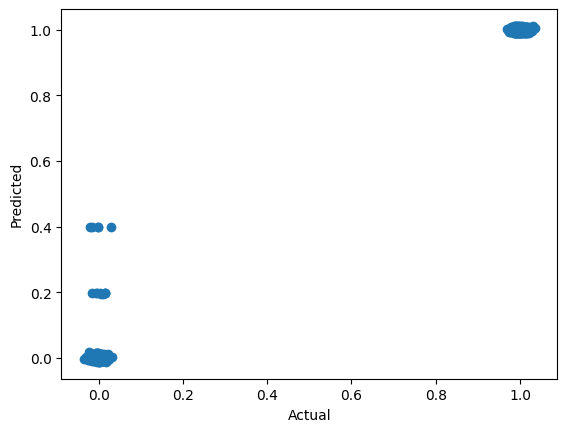

In [29]:
plt.scatter(y_test,y_pred);
plt.xlabel('Actual');
plt.ylabel('Predicted');

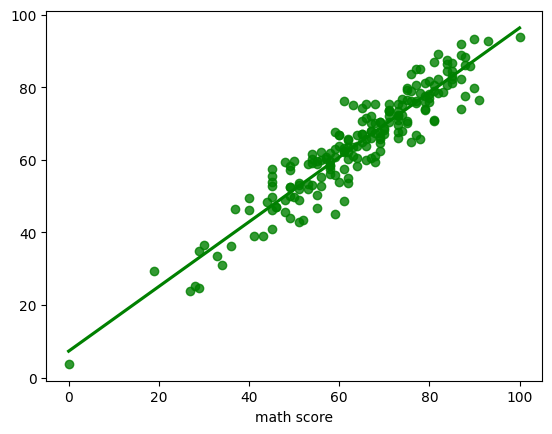

In [26]:
sns.regplot(x=y_test,y=y_pred,ci=None,color ='green');

Difference between Actual and Predicted Values

In [30]:
pred_df=pd.DataFrame({'Actual Value':y_test,'Predicted Value':y_pred,'Difference':y_test-y_pred})
pred_df

,Actual Value,Predicted Value,Difference
1501,-0.010612,-0.002868,-0.007744
2586,0.987578,0.998725,-0.011148
2653,-0.012226,-0.007422,-0.004804
1055,-0.008802,0.005127,-0.013929
705,0.015866,-0.004083,0.019950
...,...,...,...
908,0.009931,-0.006941,0.016872
2114,0.010545,-0.003057,0.013602
3896,0.995640,1.008672,-0.013032
1627,-0.003121,0.001672,-0.004793


In [9]:
import pandas as pd
df=pd.read_csv('data/augmented_data.csv')

In [10]:
df.dtypes

age                       float64
blood_pressure            float64
albumin                   float64
sugar                     float64
pus_cell                  float64
blood_glucose_random      float64
blood_urea                float64
serum_creatinine          float64
sodium                    float64
haemoglobin               float64
packed_cell_volume        float64
white_blood_cell_count    float64
red_blood_cell_count      float64
hypertension              float64
diabetes_mellitus         float64
appetite                  float64
peda_edema                float64
classification            float64
dtype: object